<a href="https://colab.research.google.com/github/rafaelarruda/Dataset-AirPassagers/blob/main/Air_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue size=7>Tratando os dados

In [1]:
import pandas as pd

dados = pd.read_csv('/content/drive/MyDrive/DataScience/Dados/AirPassengers.csv')
dados

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


**Mudando os nomes das colunas**

In [2]:
dados.columns=['mes','passageiros']
dados.head()

,mes,passageiros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


**Verificando valores null**

In [3]:
dados.isnull().sum()

mes            0
passageiros    0
dtype: int64

<font color = red>Sem valores null


**Valores únicos**

In [4]:
dados['mes'].unique()

array(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10', '1949-11', '1949-12',
       '1950-01', '1950-02', '1950-03', '1950-04', '1950-05', '1950-06',
       '1950-07', '1950-08', '1950-09', '1950-10', '1950-11', '1950-12',
       '1951-01', '1951-02', '1951-03', '1951-04', '1951-05', '1951-06',
       '1951-07', '1951-08', '1951-09', '1951-10', '1951-11', '1951-12',
       '1952-01', '1952-02', '1952-03', '1952-04', '1952-05', '1952-06',
       '1952-07', '1952-08', '1952-09', '1952-10', '1952-11', '1952-12',
       '1953-01', '1953-02', '1953-03', '1953-04', '1953-05', '1953-06',
       '1953-07', '1953-08', '1953-09', '1953-10', '1953-11', '1953-12',
       '1954-01', '1954-02', '1954-03', '1954-04', '1954-05', '1954-06',
       '1954-07', '1954-08', '1954-09', '1954-10', '1954-11', '1954-12',
       '1955-01', '1955-02', '1955-03', '1955-04', '1955-05', '1955-06',
       '1955-07', '1955-08', '1955-09', '1955-10', 

In [5]:
print('Maior quantidade de passageiros:',dados.passageiros.max())
print('Menor quantidade de pessageiros:', dados.passageiros.min())

Maior quantidade de passageiros: 622
Menor quantidade de pessageiros: 104


**90% do valor de passageiros**

In [6]:
pas = dados.passageiros.quantile(.90).round()
print('Valor máximo de passageiros', pas)

Valor máximo de passageiros 453.0


**Dados estatísticos dos 12° meses de 1949**

In [7]:
dt = dados.groupby(['mes']).agg({'passageiros': ['mean', 'median','max','std']})
dt.head(12)

passageiros                
               mean median  max std
mes                                
1949-01       112.0  112.0  112 NaN
1949-02       118.0  118.0  118 NaN
1949-03       132.0  132.0  132 NaN
1949-04       129.0  129.0  129 NaN
1949-05       121.0  121.0  121 NaN
1949-06       135.0  135.0  135 NaN
1949-07       148.0  148.0  148 NaN
1949-08       148.0  148.0  148 NaN
1949-09       136.0  136.0  136 NaN
1949-10       119.0  119.0  119 NaN
1949-11       104.0  104.0  104 NaN
1949-12       118.0  118.0  118 NaN

**Dados estatísticos usando o total de dados da coluna**

In [8]:
print('Média de passageiros:',dados.passageiros.mean())
print('Mediana de passageiros:',dados.passageiros.median())
print('Moda de passageiros:',dados.passageiros.mode())
print('Desvio padrão de passageiros:',dados.passageiros.std())

Média de passageiros: 280.2986111111111
Mediana de passageiros: 265.5
Moda de passageiros: 0    229
dtype: int64
Desvio padrão de passageiros: 119.96631694294321


**Plotando os dados**

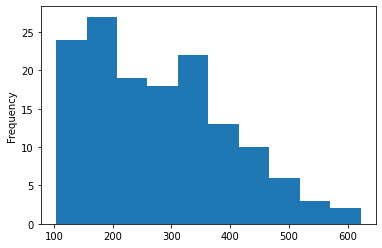

In [9]:
dados.passageiros.plot(kind='hist')

**Conclusão:** os dados que mais foram mostrados?
* 150 = 25x
* 100 = 24x
* ...

<font color=blue size=5> Mostrando os dados estatísticos em um gráfico do seaborn

São mostrados neste gráfico:

* mostra 25%
* 50% (median)
* 75%
* 'Max'
* as 2 bolinhas pintadas de preto geralmente são outliers 

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passageiros, dtype: float64

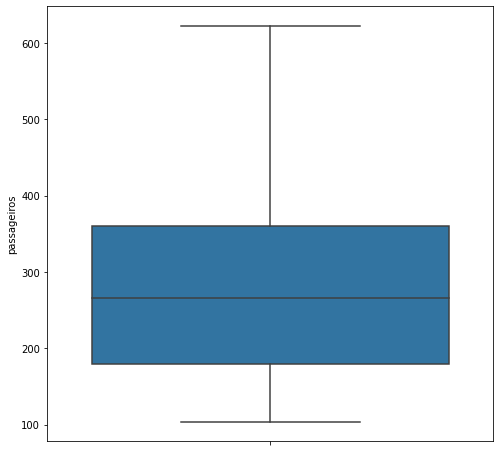

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8)) 
sns.boxplot(y=dados.passageiros) 

dados.passageiros.describe()

# <font color=green size=7>Serie Temporal

In [11]:
dados

,mes,passageiros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [12]:
print('Tipos de dados usado na tabela: ')
dados.dtypes

Tipos de dados usado na tabela: 


mes            object
passageiros     int64
dtype: object

**Convertendo o tipo de dados da coluna mês, para um datetime**

In [13]:
dados.mes = pd.to_datetime(dados.mes)
print('Resultado:')
dados.dtypes

Resultado:


mes            datetime64[ns]
passageiros             int64
dtype: object

**Importando Matplotlib**

In [14]:
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt

!pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: python-dateutil, kiwisolver, pyparsing, cycler, numpy
Required-by: yellowbrick, seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft, arviz


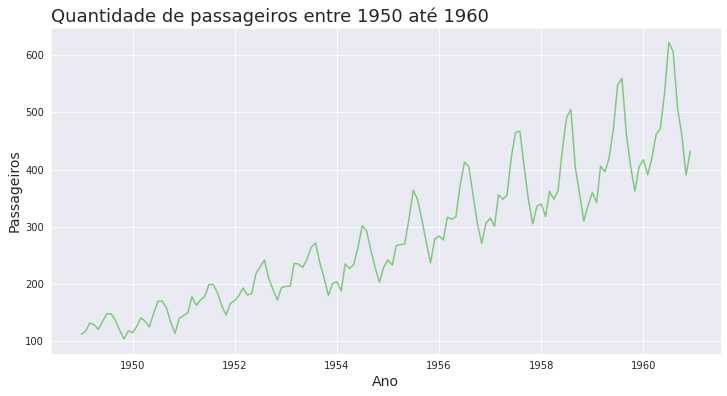

In [15]:
import seaborn as sns

sns.set_palette('Accent')  # cor da linha
sns.set_style('darkgrid')  # quadrados escuros no fundo
ax = sns.lineplot(x='mes',y='passageiros', data=dados)
ax.figure.set_size_inches(12,6)  # Tamanho da imagem
ax.set_title('Quantidade de passageiros entre 1950 até 1960', loc='left', fontsize=18)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Passageiros', fontsize=14)
ax = ax  # mostrar somente o gráfico sem nenhum dado imposto nele

**Quanto foi o aumento mensal**

In [16]:
dados['aumento'] = dados.passageiros.diff()
dados.head(13)

,mes,passageiros,aumento
0,1949-01-01,112,NaN
1,1949-02-01,118,6.0
2,1949-03-01,132,14.0
3,1949-04-01,129,-3.0
4,1949-05-01,121,-8.0
5,1949-06-01,135,14.0
6,1949-07-01,148,13.0
7,1949-08-01,148,0.0
8,1949-09-01,136,-12.0
9,1949-10-01,119,-17.0


**Conclusão:**ocorreu um aumento significativo em alguns meses. Sendo eles: Março, Junho, Julho e Dezembro

**Feriados:**
* Março = Carnaval, dia da mulher
* Junho = Dia dos namorados, dia de São João
* Julho = ?
* Dezembro = Natal, ano novo.

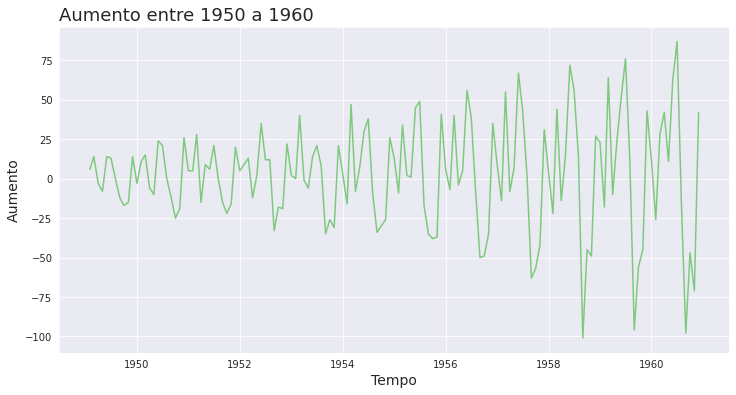

In [17]:
sns.set_palette('Accent')  
sns.set_style('darkgrid')  
ax = sns.lineplot(x='mes',y='aumento', data=dados)
ax.figure.set_size_inches(12,6)  
ax.set_title('Aumento entre 1950 a 1960', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax 

**Criar um função para este gráfico acima**

In [18]:
def plotar(x,y,data,titulo,xlabel,ylabel):
  sns.set_palette('Accent')  
  sns.set_style('darkgrid')  
  ax = sns.lineplot(x=x,y=y, data=data)
  ax.figure.set_size_inches(12,6)  
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(xlabel, fontsize=14)
  ax.set_ylabel(ylabel, fontsize=14)
  ax = ax 

**Testando a função**

In [19]:
dados.head(3)

,mes,passageiros,aumento
0,1949-01-01,112,NaN
1,1949-02-01,118,6.0
2,1949-03-01,132,14.0


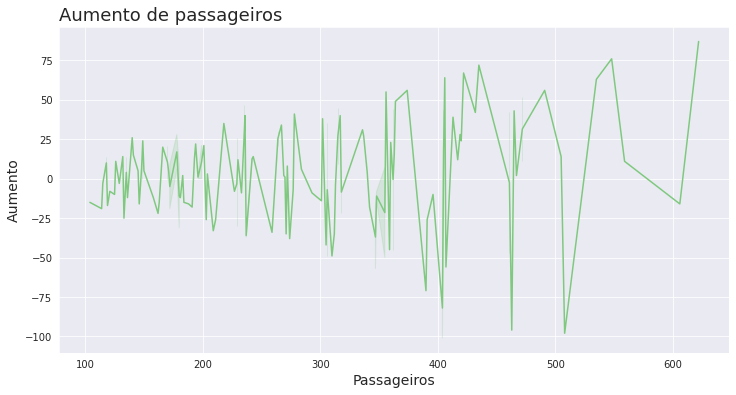

In [20]:
plotar('passageiros','aumento',dados,'Aumento de passageiros',
       'Passageiros','Aumento')

**Vendo o quanto está acelerando**

In [21]:
dados['aceleracao'] = dados.aumento.diff()
dados.head(13)

,mes,passageiros,aumento,aceleracao
0,1949-01-01,112,NaN,NaN
1,1949-02-01,118,6.0,NaN
2,1949-03-01,132,14.0,8.0
3,1949-04-01,129,-3.0,-17.0
4,1949-05-01,121,-8.0,-5.0
5,1949-06-01,135,14.0,22.0
6,1949-07-01,148,13.0,-1.0
7,1949-08-01,148,0.0,-13.0
8,1949-09-01,136,-12.0,-12.0
9,1949-10-01,119,-17.0,-5.0


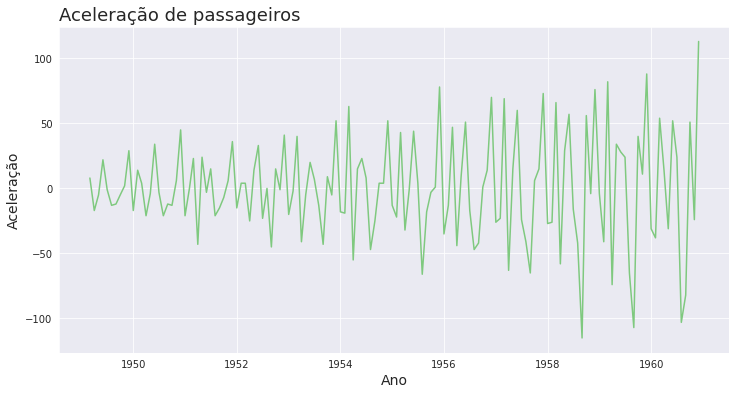

In [22]:
plotar('mes','aceleracao',dados,'Aceleração de passageiros',
       'Ano','Aceleração')

**Mostrando os plots lado a lado**

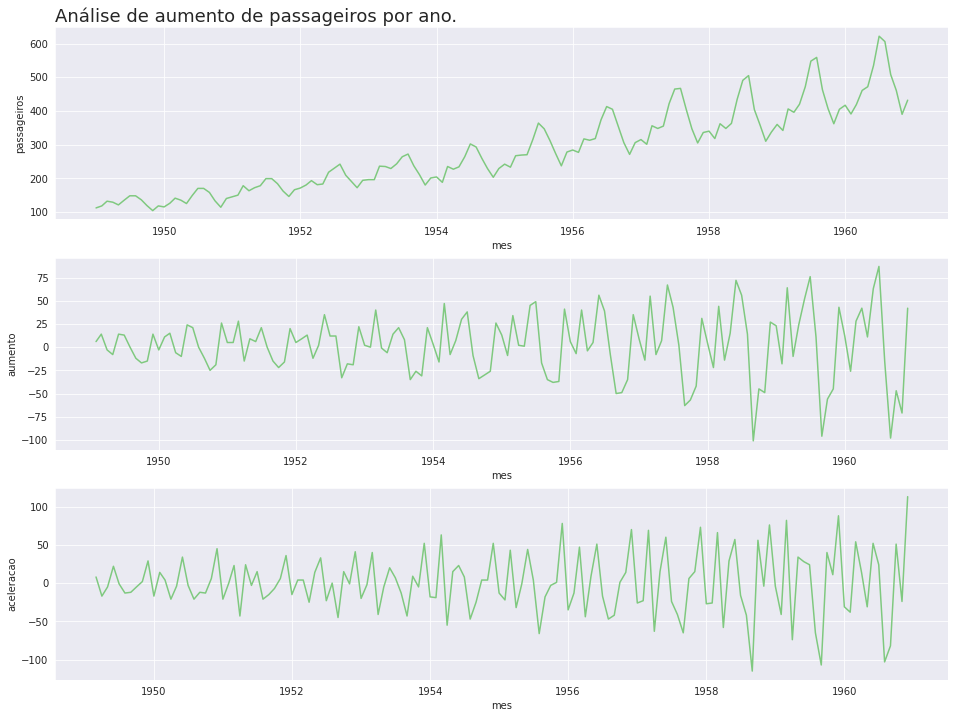

In [23]:
plt.figure(figsize=(16,12))
ax= plt.subplot(3,1,1)
ax.set_title('Análise de aumento de passageiros por ano.', fontsize=18, loc='left')
sns.lineplot(x='mes', y='passageiros', data=dados)

plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=dados)

plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=dados)
ax = ax

**Autocorrelação de passageiros**



<font color=red>**Autocorrelação Interpretação**
*    1	 =             correlação perfeita positiva
*  0,7 a 0,9	=        correlação forte
*  0,4 a 0,7	=        correlação moderada
*  0,2 a 0,4	=        correlação fraca
*   0	        =      correlação nula
*  < 0	      =        correlação negativa
*  -1	        =      correlação perfeita negativa


In [24]:
from pandas.plotting import autocorrelation_plot

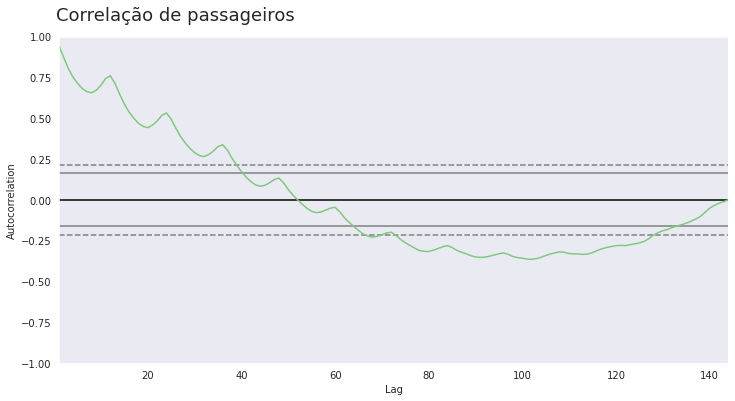

In [25]:
ax= plt.figure(figsize=(12,6))
ax.suptitle('Correlação de passageiros', fontsize=18, x=0.26,y=0.95)
autocorrelation_plot(dados['passageiros'])
ax = ax

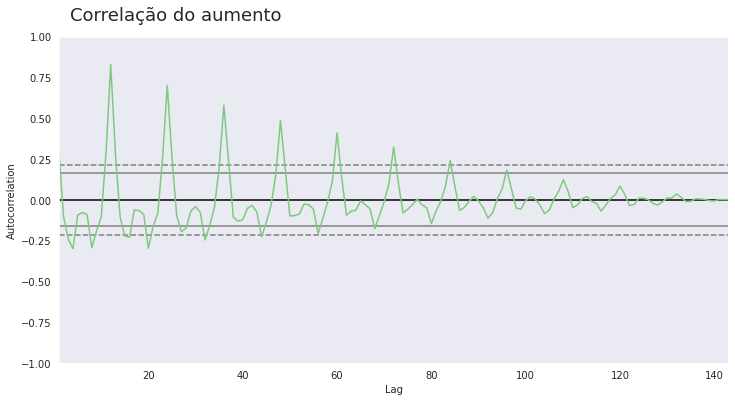

In [26]:
ax= plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26,y=0.95)
autocorrelation_plot(dados['aumento'][1:]) # 1: de onde está começado nesta tabela
ax = ax

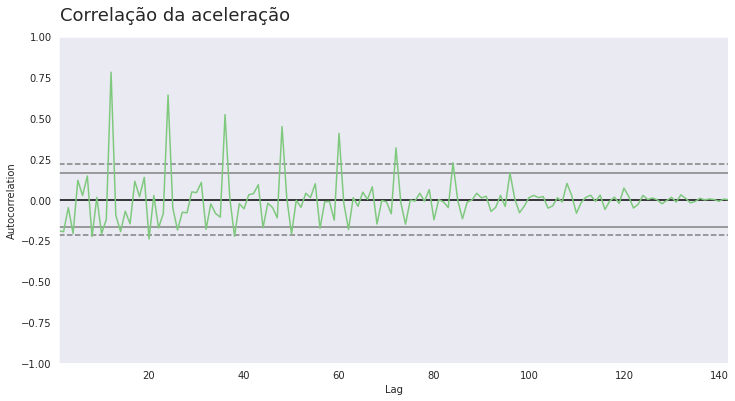

In [27]:
ax= plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26,y=0.95)
autocorrelation_plot(dados['aceleracao'][2:]) # 2: de onde está começado nesta tabela
ax = ax

**Conclusão:Ambas deram correlação nula**